In [1]:
from sklearn.ensemble import RandomForestClassifier as RandomForest
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy as sp
import seaborn as sns
import sklearn.metrics as metrics
import warnings

In [2]:
adnimerge = pd.read_csv('data-test(ADvsMCI文章数据).csv') # 读取全部数据
adnimerge.head()

,RID,Label,Visit_Code,RBM Sample ID,Sample_Received_Date,Alpha-1-Microglobulin (A1Micro) (ug/ml),Alpha-2-Macroglobulin (A2Macro) (mg/mL),Alpha-1-Antichymotrypsin (AACT) (ug/ml),Alpha-1-Antitrypsin (AAT) (mg/mL),Angiotensin-Converting Enzyme (ACE) (ng/ml),...,Thrombopoietin (ng/mL),TNF-Related Apoptosis-Inducing Ligand Re (ng/mL),Serotransferrin (Transferrin) (mg/dl),Thyroid-Stimulating Hormone (TSH) (uIU/mL),Transthyretin (TTR) (mg/dl),Vascular Cell Adhesion Molecule-1 (VCAM- (ng/mL),Vascular Endothelial Growth Factor (VEGF (pg/mL),Vitronectin (ug/ml),Vitamin K-Dependent Protein S (VKDPS) (ug/ml),von Willebrand Factor (vWF) (ug/mL)
0,3,AD,bl,KA8000CL-02,13-Sep-05,1.17609,0.07918,2.33445,0.44716,2.00432,...,1.30,1.34242,3.41330,0.55630,2.68305,2.98722,2.97035,2.96379,1.23045,1.14613
1,10,AD,bl,AA80013M-03,11-Nov-05,1.14613,0.07918,2.41664,0.38021,2.10721,...,1.30,1.23045,3.35984,0.41497,2.40654,2.88024,2.74741,2.88536,1.23045,1.51851
2,29,AD,bl,BA8000YF-03,1-Nov-05,0.95904,0.04139,2.46687,0.53148,2.15534,...,0.51,1.07918,3.51055,0.43136,2.53403,2.84136,2.75358,2.88536,1.34242,1.63347
3,41,MCI,m12,DA8038PL-04,15-Nov-06,0.89209,0.04139,2.34635,0.43136,1.77085,...,2.50,1.07918,3.50243,0.50515,2.68124,2.92273,2.66464,2.93952,1.32222,1.65321
4,51,MCI,m12,BA8039TK-03,3-Jan-07,1.07918,-0.00436,2.31387,0.34242,1.93450,...,2.50,1.20412,3.45939,0.11394,2.60853,2.77379,2.72099,3.02119,1.34242,1.85126


In [3]:
adnimerge['Label'].value_counts() # 重新查看目标分布

MCI    136
AD     112
Name: Label, dtype: int64

In [4]:
# 查看全部数据大小
adnimerge.shape

(248, 151)

In [5]:
# 缺失值计数
for col in adnimerge.columns:
    print(col, adnimerge[col].isnull().sum())

RID 0
Label 0
Visit_Code 0
RBM Sample ID 0
Sample_Received_Date 0
Alpha-1-Microglobulin (A1Micro) (ug/ml) 0
Alpha-2-Macroglobulin (A2Macro) (mg/mL) 0
Alpha-1-Antichymotrypsin (AACT) (ug/ml) 0
Alpha-1-Antitrypsin (AAT) (mg/mL) 0
Angiotensin-Converting Enzyme (ACE) (ng/ml) 0
Adiponectin (ug/mL) 0
Alpha-Fetoprotein (AFP) (ng/mL) 0
Agouti-Related Protein (AGRP) (pg/mL) 0
Angiopoietin-2 (ANG-2) (ng/mL) 0
Angiotensinogen (ng/mL) 0
Apolipoprotein A-I (Apo A-I) (mg/mL) 0
Apolipoprotein A-II (Apo A-II) (ng/ml) 0
Apolipoprotein A-IV (Apo A-IV) (ug/ml) 0
Apolipoprotein B (Apo B) (ug/ml) 0
Apolipoprotein C-I (Apo C-I) (ng/ml) 0
Apolipoprotein C-III (Apo C-III) (ug/mL) 0
Apolipoprotein D (Apo D) (ug/ml) 0
Apolipoprotein E (Apo E) (ug/ml) 0
Apolipoprotein H (Apo H) (ug/mL) 0
AXL Receptor Tyrosine Kinase (AXL) (ng/mL) 0
Beta-2-Microglobulin (B2M) (ug/mL) 0
Brain-Derived Neurotrophic Factor (BDNF) (ng/mL) 0
B Lymphocyte Chemoattractant (BLC) (pg/ml) 0
Bone Morphogenetic Protein 6 (BMP-6) (ng/mL) 0
Bra

In [6]:
#根据文献筛选的特征
data=adnimerge[['Label','Alpha-2-Macroglobulin (A2Macro) (mg/mL)','Apolipoprotein E (Apo E) (ug/ml)','Brain Natriuretic Peptide  (BNP) (pg/ml)',
                 'Eotaxin-3 (pg/mL)','Receptor for advanced glycosylation end (ng/mL)','Serum Glutamic Oxaloacetic Transaminase (ug/mL)',
                'Pregnancy-Associated Plasma Protein A (P (mIU/mL)','Apolipoprotein H (Apo H) (ug/mL)','Complement C3 (C3) (mg/mL)',
                'Peptide YY (PYY) (pg/mL)','Bone Morphogenetic Protein 6 (BMP-6) (ng/mL)','Betacellulin (BTC) (pg/mL)','C-Reactive Protein (CRP) (ug/mL)',
                'Immunoglobulin M (IGM) (mg/mL)','Pancreatic Polypeptide (PPP) (pg/ml)'
               ]]

data

,Label,Alpha-2-Macroglobulin (A2Macro) (mg/mL),Apolipoprotein E (Apo E) (ug/ml),Brain Natriuretic Peptide (BNP) (pg/ml),Eotaxin-3 (pg/mL),Receptor for advanced glycosylation end (ng/mL),Serum Glutamic Oxaloacetic Transaminase (ug/mL),Pregnancy-Associated Plasma Protein A (P (mIU/mL),Apolipoprotein H (Apo H) (ug/mL),Complement C3 (C3) (mg/mL),Peptide YY (PYY) (pg/mL),Bone Morphogenetic Protein 6 (BMP-6) (ng/mL),Betacellulin (BTC) (pg/mL),C-Reactive Protein (CRP) (ug/mL),Immunoglobulin M (IGM) (mg/mL),Pancreatic Polypeptide (PPP) (pg/ml)
0,AD,0.07918,1.57978,3.11394,2.68034,1.00000,2.3,-1.44370,574,0.30103,2.50379,0.87506,2.39794,-0.25964,0.27875,2.50106
1,AD,0.07918,1.88649,3.23300,2.68034,1.00000,2.3,-1.88606,417,0.32222,1.39794,0.83251,2.33244,-0.06048,0.47712,1.69020
2,AD,0.04139,1.70757,2.78533,2.68034,0.65321,3.0,-1.88606,423,0.25527,1.79239,0.96379,2.39794,0.07918,0.36173,2.60097
3,MCI,0.04139,1.69020,2.87622,1.54407,0.14613,2.9,-1.33724,171,0.20412,1.86923,0.88649,2.53148,-0.30980,0.39794,1.69897
4,MCI,-0.00436,1.76343,2.99034,2.44871,0.77085,2.5,-1.58503,375,0.20412,1.85126,1.11394,2.56585,-0.35655,0.41497,1.73239
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
243,AD,0.07918,1.83885,2.87390,2.68931,0.74036,2.8,-2.26761,350,0.25527,2.22272,0.95904,2.51055,-0.30103,0.04139,1.67210
244,AD,-0.05061,1.87506,2.96895,2.89597,0.74036,3.7,-2.25964,338,0.17609,2.36549,2.22272,3.25768,-0.22915,0.47712,1.69020
245,AD,-0.07572,1.79239,2.60959,2.27184,0.91908,2.5,-1.55284,351,0.23045,1.39794,0.90849,2.43775,-0.44370,0.53148,2.19033
246,MCI,0.00000,1.75587,2.95665,2.52114,0.68124,3.0,-1.53760,358,0.23045,2.37107,1.23045,2.36361,0.00000,0.14613,1.98227


In [7]:
cols_with_na=[]

for column in data:
    if data[column].isnull().any()==True:
        cols_with_na.append(column)

# 平均值填充
meandf = data.copy()
for col in cols_with_na:
    if data[col].dtype=='float64':
        meandf[col] = data[col].fillna(data[col].mean())
    else: #对于非数字数据
        meandf[col] = data[col].fillna(data[col].mode()[0])
        
np.any(pd.isnull(meandf)) # If `False`，确认 meandf 现在是无 Nan 的

False

In [8]:
meandf.head()

,Label,Alpha-2-Macroglobulin (A2Macro) (mg/mL),Apolipoprotein E (Apo E) (ug/ml),Brain Natriuretic Peptide (BNP) (pg/ml),Eotaxin-3 (pg/mL),Receptor for advanced glycosylation end (ng/mL),Serum Glutamic Oxaloacetic Transaminase (ug/mL),Pregnancy-Associated Plasma Protein A (P (mIU/mL),Apolipoprotein H (Apo H) (ug/mL),Complement C3 (C3) (mg/mL),Peptide YY (PYY) (pg/mL),Bone Morphogenetic Protein 6 (BMP-6) (ng/mL),Betacellulin (BTC) (pg/mL),C-Reactive Protein (CRP) (ug/mL),Immunoglobulin M (IGM) (mg/mL),Pancreatic Polypeptide (PPP) (pg/ml)
0,AD,0.07918,1.57978,3.11394,2.68034,1.00000,2.3,-1.44370,574,0.30103,2.50379,0.87506,2.39794,-0.25964,0.27875,2.50106
1,AD,0.07918,1.88649,3.23300,2.68034,1.00000,2.3,-1.88606,417,0.32222,1.39794,0.83251,2.33244,-0.06048,0.47712,1.69020
2,AD,0.04139,1.70757,2.78533,2.68034,0.65321,3.0,-1.88606,423,0.25527,1.79239,0.96379,2.39794,0.07918,0.36173,2.60097
3,MCI,0.04139,1.69020,2.87622,1.54407,0.14613,2.9,-1.33724,171,0.20412,1.86923,0.88649,2.53148,-0.30980,0.39794,1.69897
4,MCI,-0.00436,1.76343,2.99034,2.44871,0.77085,2.5,-1.58503,375,0.20412,1.85126,1.11394,2.56585,-0.35655,0.41497,1.73239


In [9]:
# 对目标进行映射编码
mapping = {
           'MCI': 0,
           'AD': 1,
#           'CN': 2,
#           'EMCI':3,
#           'SMC':4
}
meandf['Label'] =meandf['Label'].map(mapping)
meandf.head()

,Label,Alpha-2-Macroglobulin (A2Macro) (mg/mL),Apolipoprotein E (Apo E) (ug/ml),Brain Natriuretic Peptide (BNP) (pg/ml),Eotaxin-3 (pg/mL),Receptor for advanced glycosylation end (ng/mL),Serum Glutamic Oxaloacetic Transaminase (ug/mL),Pregnancy-Associated Plasma Protein A (P (mIU/mL),Apolipoprotein H (Apo H) (ug/mL),Complement C3 (C3) (mg/mL),Peptide YY (PYY) (pg/mL),Bone Morphogenetic Protein 6 (BMP-6) (ng/mL),Betacellulin (BTC) (pg/mL),C-Reactive Protein (CRP) (ug/mL),Immunoglobulin M (IGM) (mg/mL),Pancreatic Polypeptide (PPP) (pg/ml)
0,1,0.07918,1.57978,3.11394,2.68034,1.00000,2.3,-1.44370,574,0.30103,2.50379,0.87506,2.39794,-0.25964,0.27875,2.50106
1,1,0.07918,1.88649,3.23300,2.68034,1.00000,2.3,-1.88606,417,0.32222,1.39794,0.83251,2.33244,-0.06048,0.47712,1.69020
2,1,0.04139,1.70757,2.78533,2.68034,0.65321,3.0,-1.88606,423,0.25527,1.79239,0.96379,2.39794,0.07918,0.36173,2.60097
3,0,0.04139,1.69020,2.87622,1.54407,0.14613,2.9,-1.33724,171,0.20412,1.86923,0.88649,2.53148,-0.30980,0.39794,1.69897
4,0,-0.00436,1.76343,2.99034,2.44871,0.77085,2.5,-1.58503,375,0.20412,1.85126,1.11394,2.56585,-0.35655,0.41497,1.73239


In [10]:
meandf.isnull().sum()

Label                                                0
Alpha-2-Macroglobulin (A2Macro) (mg/mL)              0
Apolipoprotein E (Apo E) (ug/ml)                     0
Brain Natriuretic Peptide  (BNP) (pg/ml)             0
Eotaxin-3 (pg/mL)                                    0
Receptor for advanced glycosylation end (ng/mL)      0
Serum Glutamic Oxaloacetic Transaminase (ug/mL)      0
Pregnancy-Associated Plasma Protein A (P (mIU/mL)    0
Apolipoprotein H (Apo H) (ug/mL)                     0
Complement C3 (C3) (mg/mL)                           0
Peptide YY (PYY) (pg/mL)                             0
Bone Morphogenetic Protein 6 (BMP-6) (ng/mL)         0
Betacellulin (BTC) (pg/mL)                           0
C-Reactive Protein (CRP) (ug/mL)                     0
Immunoglobulin M (IGM) (mg/mL)                       0
Pancreatic Polypeptide (PPP) (pg/ml)                 0
dtype: int64

In [11]:
X=meandf.drop(['Label'],axis=1)#把RID，标签，测试时间这些非数据信息分开
y=meandf['Label']#标签信息
X

,Alpha-2-Macroglobulin (A2Macro) (mg/mL),Apolipoprotein E (Apo E) (ug/ml),Brain Natriuretic Peptide (BNP) (pg/ml),Eotaxin-3 (pg/mL),Receptor for advanced glycosylation end (ng/mL),Serum Glutamic Oxaloacetic Transaminase (ug/mL),Pregnancy-Associated Plasma Protein A (P (mIU/mL),Apolipoprotein H (Apo H) (ug/mL),Complement C3 (C3) (mg/mL),Peptide YY (PYY) (pg/mL),Bone Morphogenetic Protein 6 (BMP-6) (ng/mL),Betacellulin (BTC) (pg/mL),C-Reactive Protein (CRP) (ug/mL),Immunoglobulin M (IGM) (mg/mL),Pancreatic Polypeptide (PPP) (pg/ml)
0,0.07918,1.57978,3.11394,2.68034,1.00000,2.3,-1.44370,574,0.30103,2.50379,0.87506,2.39794,-0.25964,0.27875,2.50106
1,0.07918,1.88649,3.23300,2.68034,1.00000,2.3,-1.88606,417,0.32222,1.39794,0.83251,2.33244,-0.06048,0.47712,1.69020
2,0.04139,1.70757,2.78533,2.68034,0.65321,3.0,-1.88606,423,0.25527,1.79239,0.96379,2.39794,0.07918,0.36173,2.60097
3,0.04139,1.69020,2.87622,1.54407,0.14613,2.9,-1.33724,171,0.20412,1.86923,0.88649,2.53148,-0.30980,0.39794,1.69897
4,-0.00436,1.76343,2.99034,2.44871,0.77085,2.5,-1.58503,375,0.20412,1.85126,1.11394,2.56585,-0.35655,0.41497,1.73239
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
243,0.07918,1.83885,2.87390,2.68931,0.74036,2.8,-2.26761,350,0.25527,2.22272,0.95904,2.51055,-0.30103,0.04139,1.67210
244,-0.05061,1.87506,2.96895,2.89597,0.74036,3.7,-2.25964,338,0.17609,2.36549,2.22272,3.25768,-0.22915,0.47712,1.69020
245,-0.07572,1.79239,2.60959,2.27184,0.91908,2.5,-1.55284,351,0.23045,1.39794,0.90849,2.43775,-0.44370,0.53148,2.19033
246,0.00000,1.75587,2.95665,2.52114,0.68124,3.0,-1.53760,358,0.23045,2.37107,1.23045,2.36361,0.00000,0.14613,1.98227


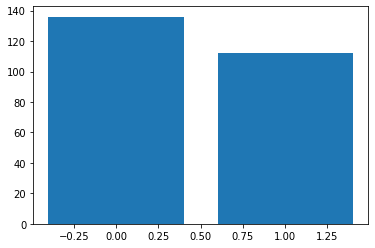

In [12]:
plt.bar(y.value_counts().index, y.value_counts())
plt.show()

In [13]:
# # 特征缩放，归一化
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [14]:
#RF
from sklearn.ensemble import RandomForestClassifier
model_RF = RandomForestClassifier(random_state=10, n_estimators=100)

In [15]:
#K折交叉验证简单例子  RF
from sklearn.model_selection import KFold
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import cross_val_score
#model = classifier#建立一个模型
kf=KFold(n_splits=5,shuffle=True)#建立k折
rkf = RepeatedKFold(n_splits=5, n_repeats=10, random_state =100)#建立rkf
print(cross_val_score(model_RF, X, y, scoring='accuracy', cv=kf))#将k折应用到模型，并返回结果。
#cross_val_score是一个计算得分的函数

[0.88       0.78       0.9        0.83673469 0.81632653]


In [16]:
def false_positive_rate(y_true, y_pred):

    # false positive
    fp = ((y_pred == 1) & (y_true == 0)).sum()

    # true negative
    tn = ((y_pred == 0) & (y_true == 0)).sum()

    # false positive rate
    return fp / (fp + tn)

In [17]:
#catboost
from catboost import CatBoostClassifier#Catboost集成学习分类器

model_CB = CatBoostClassifier(iterations=1000,learning_rate=0.1,max_depth=7,verbose=100,
                                      early_stopping_rounds=500,task_type='GPU',eval_metric='AUC',
                                      )

In [18]:
#交叉验证 SVM
from sklearn.metrics import fbeta_score, make_scorer
from sklearn.model_selection import cross_validate #评价多个指标
from sklearn.pipeline import Pipeline#标准化集成
scoring = {'acc': 'accuracy',
           'precison': 'precision_macro',
           'recall': 'recall_macro',
           'F1-scores': 'f1_macro',
           'false_positive_rate': make_scorer(false_positive_rate),
           'AUC': 'roc_auc'}

pipeline = Pipeline([('transformer', sc), ('estimator', model_CB)])#标准化

scores = cross_validate(pipeline, X, y, scoring=scoring,
                         cv=kf, return_train_score=True)

print(scores.keys())
print("accuracy:",scores['test_acc'].mean())  
print("precison:",scores['test_precison'].mean())
print("recall:",scores['test_recall'].mean())
print("F1-scores:",scores['test_F1-scores'].mean())
print("test_false_positive_rate:",scores['test_false_positive_rate'].mean()) 
print("AUC:",scores['test_AUC'].mean())

Default metric period is 5 because AUC is/are not implemented for GPU


0:	total: 35.5ms	remaining: 35.5s
100:	total: 3.24s	remaining: 28.9s
200:	total: 6.48s	remaining: 25.7s
300:	total: 9.71s	remaining: 22.6s
400:	total: 12.9s	remaining: 19.3s
500:	total: 16.2s	remaining: 16.1s
600:	total: 19.4s	remaining: 12.9s
700:	total: 22.6s	remaining: 9.65s
800:	total: 25.9s	remaining: 6.43s
900:	total: 29.1s	remaining: 3.2s
999:	total: 32.3s	remaining: 0us


Default metric period is 5 because AUC is/are not implemented for GPU


0:	total: 33.5ms	remaining: 33.5s
100:	total: 3.27s	remaining: 29.1s
200:	total: 6.49s	remaining: 25.8s
300:	total: 9.71s	remaining: 22.6s
400:	total: 12.9s	remaining: 19.3s
500:	total: 16.2s	remaining: 16.2s
600:	total: 19.5s	remaining: 12.9s
700:	total: 22.8s	remaining: 9.73s
800:	total: 26.1s	remaining: 6.48s
900:	total: 29.4s	remaining: 3.23s
999:	total: 32.7s	remaining: 0us


Default metric period is 5 because AUC is/are not implemented for GPU


0:	total: 33.1ms	remaining: 33.1s
100:	total: 3.36s	remaining: 29.9s
200:	total: 6.73s	remaining: 26.8s
300:	total: 10.1s	remaining: 23.4s
400:	total: 13.4s	remaining: 20s
500:	total: 16.8s	remaining: 16.7s
600:	total: 20.2s	remaining: 13.4s
700:	total: 23.6s	remaining: 10.1s
800:	total: 26.9s	remaining: 6.69s
900:	total: 30.3s	remaining: 3.33s
999:	total: 33.6s	remaining: 0us


Default metric period is 5 because AUC is/are not implemented for GPU


0:	total: 33.7ms	remaining: 33.7s
100:	total: 3.43s	remaining: 30.5s
200:	total: 6.85s	remaining: 27.2s
300:	total: 10.4s	remaining: 24.2s
400:	total: 13.8s	remaining: 20.7s
500:	total: 17.2s	remaining: 17.1s
600:	total: 20.7s	remaining: 13.7s
700:	total: 24.1s	remaining: 10.3s
800:	total: 27.6s	remaining: 6.86s
900:	total: 31.1s	remaining: 3.42s
999:	total: 34.5s	remaining: 0us


Default metric period is 5 because AUC is/are not implemented for GPU


0:	total: 33.2ms	remaining: 33.2s
100:	total: 3.52s	remaining: 31.4s
200:	total: 7.03s	remaining: 27.9s
300:	total: 10.6s	remaining: 24.6s
400:	total: 14.1s	remaining: 21.1s
500:	total: 17.6s	remaining: 17.5s
600:	total: 21s	remaining: 14s
700:	total: 24.5s	remaining: 10.4s
800:	total: 28s	remaining: 6.95s
900:	total: 31.5s	remaining: 3.46s
999:	total: 34.9s	remaining: 0us
dict_keys(['fit_time', 'score_time', 'test_acc', 'train_acc', 'test_precison', 'train_precison', 'test_recall', 'train_recall', 'test_F1-scores', 'train_F1-scores', 'test_false_positive_rate', 'train_false_positive_rate', 'test_AUC', 'train_AUC'])
accuracy: 0.8306122448979592
precison: 0.8264359634969036
recall: 0.8265098039215687
F1-scores: 0.8251501116869573
test_false_positive_rate: 0.13539597657244715
AUC: 0.9001909854851032
